In [4]:
import GEOparse
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
import sys

# XGBoost on Martino 2015 & 2018 Methylome Data

## Data Preprocessing

In [326]:
def beta_to_m(matrix):
    '''
        convert beta values to m values
    '''
    return np.log2(np.array(matrix/(1-matrix), dtype=np.float32))

In [7]:
#https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE114134
' get 2015 data'
# gse2015 = GEOparse.get_GEO(geo="GSE59999", destdir="data")
gse2015 = GEOparse.get_GEO(filepath="./data/martino_2015Me/GSE59999_family.soft")

07-Dec-2019 21:08:47 INFO GEOparse - Parsing ./data/martino_2015Me/GSE59999_family.soft: 
07-Dec-2019 21:08:47 DEBUG GEOparse - DATABASE: GeoMiame
07-Dec-2019 21:08:47 DEBUG GEOparse - SERIES: GSE59999
07-Dec-2019 21:08:47 DEBUG GEOparse - PLATFORM: GPL13534
/Users/tjamesso/miniconda3/envs/broad/lib/python3.7/site-packages/GEOparse/GEOparse.py:88: DtypeWarning: Columns (11,14,15,36) have mixed types. Specify dtype option on import or set low_memory=False.
  return parse_GSE(filepath)
07-Dec-2019 21:08:52 DEBUG GEOparse - SAMPLE: GSM1463328
07-Dec-2019 21:08:53 DEBUG GEOparse - SAMPLE: GSM1463329
07-Dec-2019 21:08:54 DEBUG GEOparse - SAMPLE: GSM1463330
07-Dec-2019 21:08:54 DEBUG GEOparse - SAMPLE: GSM1463331
07-Dec-2019 21:08:55 DEBUG GEOparse - SAMPLE: GSM1463332
07-Dec-2019 21:08:56 DEBUG GEOparse - SAMPLE: GSM1463333
07-Dec-2019 21:08:57 DEBUG GEOparse - SAMPLE: GSM1463334
07-Dec-2019 21:08:57 DEBUG GEOparse - SAMPLE: GSM1463335
07-Dec-2019 21:08:58 DEBUG GEOparse - SAMPLE: GSM146333

In [6]:
os.listdir('./data/martino_2015Me')

['GSE59999_family.soft']

In [8]:
''' get 2018 data'''
# gse2018ii = GEOparse.get_GEO(geo="GSE114134", destdir="data")
gse2018 = GEOparse.get_GEO(filepath="./data/martino_2018Me/GSE114134_family.soft")
# os.listdir('./data/martino_2018')


07-Dec-2019 21:09:42 INFO GEOparse - Parsing ./data/martino_2018Me/GSE114134_family.soft: 
07-Dec-2019 21:09:42 DEBUG GEOparse - DATABASE: GeoMiame
07-Dec-2019 21:09:42 DEBUG GEOparse - SERIES: GSE114134
07-Dec-2019 21:09:42 DEBUG GEOparse - PLATFORM: GPL23976
07-Dec-2019 21:09:44 DEBUG GEOparse - SAMPLE: GSM3133403
07-Dec-2019 21:09:45 DEBUG GEOparse - SAMPLE: GSM3133404
07-Dec-2019 21:09:47 DEBUG GEOparse - SAMPLE: GSM3133405
07-Dec-2019 21:09:48 DEBUG GEOparse - SAMPLE: GSM3133406
07-Dec-2019 21:09:49 DEBUG GEOparse - SAMPLE: GSM3133407
07-Dec-2019 21:09:51 DEBUG GEOparse - SAMPLE: GSM3133408
07-Dec-2019 21:09:52 DEBUG GEOparse - SAMPLE: GSM3133409
07-Dec-2019 21:09:53 DEBUG GEOparse - SAMPLE: GSM3133410
07-Dec-2019 21:09:55 DEBUG GEOparse - SAMPLE: GSM3133411
07-Dec-2019 21:09:56 DEBUG GEOparse - SAMPLE: GSM3133412
07-Dec-2019 21:09:57 DEBUG GEOparse - SAMPLE: GSM3133413
07-Dec-2019 21:09:59 DEBUG GEOparse - SAMPLE: GSM3133414
07-Dec-2019 21:10:00 DEBUG GEOparse - SAMPLE: GSM313341

In [9]:
'''define which gse to use'''
# gse = gse2015

In [100]:
gse2015.metadata
gse2018.metadata

{'title': ['Methylomes from naïve CD4+ T-cells from infants and children with and without food allergy [methylation]'],
 'geo_accession': ['GSE114134'],
 'status': ['Public on May 31 2018'],
 'submission_date': ['May 07 2018'],
 'last_update_date': ['Mar 22 2019'],
 'pubmed_id': ['30120223'],
 'summary': ['Here we studied the epigenetic regulation of the naïve CD4+ T-cell activation response among children with IgE-mediated food allergy. Using integrated DNA methylation and transcriptomic profiling, we found that food allergy in infancy is associated with dysregulation of T-cell activation genes. Reduced expression of cell cycle related targets of the E2F and MYC transcription factor networks, and remodeling of DNA methylation at metabolic (RPTOR, PIK3D, MAPK1, FOXO1) and inflammatory genes (IL1R, IL18RAP, CD82) were associated with poorer T-lymphoproliferative responses in infancy after polyclonal activation of the T-cell receptor.'],
 'overall_design': ['Bisulphite converted gDNA fro

In [11]:
gse.gsms['GSM1463331'].table

,ID_REF,VALUE
0,cg13938959,0.815433
1,cg23733394,0.667910
2,cg08900511,0.906676
3,cg04410003,0.879404
4,cg18762746,0.963490
...,...,...
405653,cg05615487,0.870435
405654,cg00080682,0.921329
405655,cg08423507,0.907253
405656,cg19565306,0.227432


In [12]:
gse.phenotype_data.columns

Index(['title', 'geo_accession', 'status', 'submission_date',
       'last_update_date', 'type', 'channel_count', 'source_name_ch1',
       'organism_ch1', 'taxid_ch1', 'characteristics_ch1.0.gender',
       'characteristics_ch1.1.phenotype',
       'characteristics_ch1.2.challenge outcome', 'treatment_protocol_ch1',
       'growth_protocol_ch1', 'molecule_ch1', 'extract_protocol_ch1',
       'label_ch1', 'label_protocol_ch1', 'hyb_protocol', 'scan_protocol',
       'data_processing', 'platform_id', 'contact_name', 'contact_email',
       'contact_institute', 'contact_address', 'contact_city', 'contact_state',
       'contact_zip/postal_code', 'contact_country', 'supplementary_file',
       'series_id', 'data_row_count', 'description'],
      dtype='object')

In [13]:
# gse.phenotype_data[['characteristics_ch1.0.allergy_phenotype',
#        'characteristics_ch1.1.age', 'characteristics_ch1.2.allergy status',
#        'characteristics_ch1.3.Sex', 'characteristics_ch1.4.stimulation',
#        'characteristics_ch1.5.ancestry_strata', 'treatment_protocol_ch1']]

In [109]:
cols15 = gse2015.phenotype_data.columns
features15 = gse2015.phenotype_data[cols15[10:16]]
cols18 = gse2018.phenotype_data.columns
features18 = gse2018.phenotype_data[cols18[10:16]]

In [506]:
features15.loc[train_names_2015,:].shape
# features15.shape

(32, 6)

In [112]:
'''make all samples into dictionary'''
def samples_to_dict(features, gse):
    samples = []
    for sample_name, sample_features in features.iterrows():
    #     print("Creating sample {}".format(sample_name))
        sample_dict = {}
        sample_dict['sample_name'] = sample_name
        sample_dict['sample features'] = sample_features #note these are pandas series objects
        sample_dict['data'] = gse.gsms[sample_name].table
        samples.append(sample_dict)
    return samples

In [115]:
samples_15 = samples_to_dict(features15, gse2015)
samples_18 = samples_to_dict(features18, gse2018)

In [245]:
samples_15[0]

{'sample_name': 'GSM1463328',
 'sample features': characteristics_ch1.0.gender                                                          FEMALE
 characteristics_ch1.1.phenotype                                                 Egg.allergic
 characteristics_ch1.2.challenge outcome                                             allergic
 treatment_protocol_ch1                                                                    NA
 growth_protocol_ch1                        untouched cells rested for 48 hours in RPMI me...
 molecule_ch1                                                                     genomic DNA
 Name: GSM1463328, dtype: object,
 'data':                 ID_REF     VALUE
 ID_REF                          
 cg13938959  cg13938959  0.780938
 cg23733394  cg23733394  0.452100
 cg08900511  cg08900511  0.904995
 cg04410003  cg04410003  0.897094
 cg18762746  cg18762746  0.937166
 ...                ...       ...
 cg05615487  cg05615487  0.861876
 cg00080682  cg00080682  0.938466
 cg08

In [121]:
len(samples_15), samples_15[0], len(samples_18), samples_18[0]

(71,
 {'sample_name': 'GSM1463328',
  'sample features': characteristics_ch1.0.gender                                                          FEMALE
  characteristics_ch1.1.phenotype                                                 Egg.allergic
  characteristics_ch1.2.challenge outcome                                             allergic
  treatment_protocol_ch1                                                                    NA
  growth_protocol_ch1                        untouched cells rested for 48 hours in RPMI me...
  molecule_ch1                                                                     genomic DNA
  Name: GSM1463328, dtype: object,
  'data':                 ID_REF     VALUE
  ID_REF                          
  cg13938959  cg13938959  0.780938
  cg23733394  cg23733394  0.452100
  cg08900511  cg08900511  0.904995
  cg04410003  cg04410003  0.897094
  cg18762746  cg18762746  0.937166
  ...                ...       ...
  cg05615487  cg05615487  0.861876
  cg00080682  cg0

In [249]:
''' make giant data frame with all features and methylation data '''
def get_feature_matrix(samples):
    d0_data = samples[1]['data']
    d0_data.index = d0_data['ID_REF']
    cpg = d0_data['VALUE']
    d0_features = samples[1]['sample features']
    d0 = d0_features.append(cpg)

    feature_vecs = []
    for s in samples:
        data = s['data']
        data.index = data['ID_REF']
        cpg = data['VALUE']
        features = s['sample features']
        d = features.append(cpg)
        feature_vecs.append(d)

    feature_m = pd.concat(feature_vecs ,axis = 1)
    feature_t = feature_m.T
    return feature_t

In [250]:
features_15 = get_feature_matrix(samples_15)

In [130]:
features_18 = get_feature_matrix(samples_18)

In [497]:
features_15

,characteristics_ch1.0.gender,characteristics_ch1.1.phenotype,characteristics_ch1.2.challenge outcome,treatment_protocol_ch1,growth_protocol_ch1,molecule_ch1,cg13938959,cg23733394,cg08900511,cg04410003,...,cg06422471,cg19324023,cg19004771,cg20569369,cg26034629,cg05615487,cg00080682,cg08423507,cg19565306,cg09226288
0,FEMALE,Egg.allergic,allergic,NA,untouched cells rested for 48 hours in RPMI me...,genomic DNA,0.780938,0.4521,0.904995,0.897094,...,0.907134,0.91619,0.850124,0.869802,0.87296,0.861876,0.938466,0.91167,0.178807,0.768448
1,FEMALE,Non.allergic,nonallergic,NA,untouched cells rested for 48 hours in RPMI me...,genomic DNA,0.849993,0.439448,0.939339,0.884464,...,0.905706,0.896416,0.853825,0.858188,0.827342,0.867073,0.8839,0.894825,0.255123,0.691983
2,MALE,Peanut.allergic,allergic,NA,untouched cells rested for 48 hours in RPMI me...,genomic DNA,0.808916,0.475487,0.921199,0.910001,...,0.911795,0.932199,0.810342,0.856055,0.83853,0.84668,0.902766,0.885604,0.305552,0.77046
3,FEMALE,Peanut.sensitized,sensitized,NA,untouched cells rested for 48 hours in RPMI me...,genomic DNA,0.815433,0.66791,0.906676,0.879404,...,0.910199,0.893875,0.887602,0.870224,0.85807,0.870435,0.921329,0.907253,0.227432,0.761105
4,FEMALE,Peanut.allergic,allergic,NA,untouched cells rested for 48 hours in RPMI me...,genomic DNA,0.799225,0.38762,0.908183,0.882496,...,0.912448,0.867508,0.834638,0.853681,0.868524,0.88451,0.901682,0.903969,0.267781,0.78066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,MALE,Peanut.allergic,allergic,NA,untouched cells rested for 48 hours in RPMI me...,genomic DNA,0.808754,0.473354,0.911046,0.895579,...,0.922546,0.905274,0.812087,0.864472,0.841029,0.883782,0.897826,0.933094,0.296834,0.746121
67,FEMALE,Non.allergic,nonallergic,NA,untouched cells rested for 48 hours in RPMI me...,genomic DNA,0.833515,0.599612,0.871368,0.937265,...,0.937752,0.925167,0.872634,0.865245,0.881756,0.880947,0.902013,0.912302,0.0948948,0.796236
68,FEMALE,Peanut.sensitized,sensitized,NA,untouched cells rested for 48 hours in RPMI me...,genomic DNA,0.781575,0.687101,0.900929,0.92097,...,0.936635,0.918067,0.875856,0.880047,0.889854,0.912604,0.922206,0.92132,0.141271,0.740769
69,FEMALE,Egg.sensitized,sensitized,NA,untouched cells rested for 48 hours in RPMI me...,genomic DNA,0.786878,0.531393,0.904101,0.931156,...,0.931091,0.869253,0.861495,0.873291,0.868062,0.925606,0.912379,0.917473,0.229078,0.80135


In [136]:
features_18

,characteristics_ch1.0.allergy_phenotype,characteristics_ch1.1.age,characteristics_ch1.2.allergy status,characteristics_ch1.3.Sex,characteristics_ch1.4.stimulation,characteristics_ch1.5.ancestry_strata,cg26928153,cg16269199,cg13869341,cg24669183,...,cg06865724,cg25914522,cg10267609,cg26983430,cg22051787,cg13365400,cg21106100,cg08265308,cg14273923,cg07587934
0,transient,1,allergic,female,1,1,0.892945,0.82263,0.876781,0.862114,...,0.654599,0.603701,0.578531,0.54751,0.566827,0.472908,0.463339,0.44252,0.716565,0.835212
1,transient,1,allergic,female,0,1,0.905846,0.828238,0.876919,0.867905,...,0.501973,0.541537,0.51654,0.602668,0.609954,0.646304,0.448568,0.423743,0.487386,0.823202
2,transient,2,resolved,female,1,1,0.88254,0.795737,0.879967,0.859678,...,0.655418,0.541078,0.674934,0.573789,0.509483,0.655596,0.456333,0.512202,0.541481,0.824693
3,transient,2,resolved,female,0,1,0.91851,0.785345,0.894469,0.871269,...,0.644921,0.550464,0.566978,0.627093,0.429308,0.541988,0.473965,0.388121,0.65337,0.830141
4,transient,4,resolved,male,1,1,0.888077,0.821857,0.914033,0.819638,...,0.874144,0.850269,0.97811,0.951285,0.853552,0.638264,0.869665,0.938165,0.69346,0.810407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,transient,2,resolved,female,0,1,0.886156,0.835535,0.886776,0.830098,...,0.644139,0.549714,0.563221,0.689569,0.597847,0.633587,0.39926,0.449234,0.618613,0.840742
201,transient,1,allergic,male,1,1,0.894431,0.82614,0.898322,0.864171,...,0.858651,0.764941,0.943915,0.917094,0.826278,0.608589,0.81054,0.888854,0.581358,0.773217
202,transient,1,allergic,male,0,1,0.904942,0.833139,0.89434,0.867661,...,0.794761,0.816394,0.95511,0.912298,0.80699,0.617404,0.777255,0.900994,0.592411,0.746256
203,transient,4,resolved,male,1,1,0.900698,0.819968,0.893384,0.831852,...,0.853392,0.83415,0.972139,0.930766,0.835298,0.601846,0.865194,0.926038,0.642861,0.755468


## XGBoost to find significant features

In [373]:
# import sys
# !conda install --yes --prefix {sys.prefix} xgboost

In [32]:
import xgboost as xgb
from xgboost import XGBClassifier
import sklearn
from sklearn import metrics
from sklearn.metrics import mean_squared_error, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier

# print(classification_report(y_test, pred))

In [25]:
feature_t

,characteristics_ch1.0.gender,characteristics_ch1.1.phenotype,characteristics_ch1.2.challenge outcome,treatment_protocol_ch1,growth_protocol_ch1,molecule_ch1,cg13938959,cg23733394,cg08900511,cg04410003,...,cg06422471,cg19324023,cg19004771,cg20569369,cg26034629,cg05615487,cg00080682,cg08423507,cg19565306,cg09226288
0,FEMALE,Egg.allergic,allergic,NA,untouched cells rested for 48 hours in RPMI me...,genomic DNA,0.780938,0.4521,0.904995,0.897094,...,0.907134,0.91619,0.850124,0.869802,0.87296,0.861876,0.938466,0.91167,0.178807,0.768448
1,FEMALE,Non.allergic,nonallergic,NA,untouched cells rested for 48 hours in RPMI me...,genomic DNA,0.849993,0.439448,0.939339,0.884464,...,0.905706,0.896416,0.853825,0.858188,0.827342,0.867073,0.8839,0.894825,0.255123,0.691983
2,MALE,Peanut.allergic,allergic,NA,untouched cells rested for 48 hours in RPMI me...,genomic DNA,0.808916,0.475487,0.921199,0.910001,...,0.911795,0.932199,0.810342,0.856055,0.83853,0.84668,0.902766,0.885604,0.305552,0.77046
3,FEMALE,Peanut.sensitized,sensitized,NA,untouched cells rested for 48 hours in RPMI me...,genomic DNA,0.815433,0.66791,0.906676,0.879404,...,0.910199,0.893875,0.887602,0.870224,0.85807,0.870435,0.921329,0.907253,0.227432,0.761105
4,FEMALE,Peanut.allergic,allergic,NA,untouched cells rested for 48 hours in RPMI me...,genomic DNA,0.799225,0.38762,0.908183,0.882496,...,0.912448,0.867508,0.834638,0.853681,0.868524,0.88451,0.901682,0.903969,0.267781,0.78066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,MALE,Peanut.allergic,allergic,NA,untouched cells rested for 48 hours in RPMI me...,genomic DNA,0.808754,0.473354,0.911046,0.895579,...,0.922546,0.905274,0.812087,0.864472,0.841029,0.883782,0.897826,0.933094,0.296834,0.746121
67,FEMALE,Non.allergic,nonallergic,NA,untouched cells rested for 48 hours in RPMI me...,genomic DNA,0.833515,0.599612,0.871368,0.937265,...,0.937752,0.925167,0.872634,0.865245,0.881756,0.880947,0.902013,0.912302,0.0948948,0.796236
68,FEMALE,Peanut.sensitized,sensitized,NA,untouched cells rested for 48 hours in RPMI me...,genomic DNA,0.781575,0.687101,0.900929,0.92097,...,0.936635,0.918067,0.875856,0.880047,0.889854,0.912604,0.922206,0.92132,0.141271,0.740769
69,FEMALE,Egg.sensitized,sensitized,NA,untouched cells rested for 48 hours in RPMI me...,genomic DNA,0.786878,0.531393,0.904101,0.931156,...,0.931091,0.869253,0.861495,0.873291,0.868062,0.925606,0.912379,0.917473,0.229078,0.80135


In [26]:
def col_num(f_str):
    ''' converts e.g. "f1234" to 1234 '''
    return int(f_str[1:])

In [134]:
'Ignoring all metadata for now'
#martino 2015
X_15, y_15 = features_15.iloc[:,6:], features_15['characteristics_ch1.2.challenge outcome']
features_18 = get_feature_matrix(samples_18)
#martino 2018
X_18, y_18 = features_18.iloc[:,6:], features_18['characteristics_ch1.2.allergy status']

''' Cast pandas as np array'''
X_15_np = X.to_numpy()
X_15_np.shape

''' Change all labels to numeric labels'''
''' 2015 data '''
y_int_15 = LabelEncoder().fit_transform(y_15) # 2018 0 is 'allergic', 1 is 'control', 2 is 'resolved'
                                              # 2015 0 is 'allergic', 1 is 'nonallergic', 2 is 'sensitized'
X_allergic_v_control_15 = X_15[y_int_15 != 2]
y_allergic_v_control_15 = y_int_15[y_int_15 != 2]
X_sensitized_v_control_15 = X_15[y_int_15 != 0]
y_sensitized_v_control_15 = y_int_15[y_int_15 != 0]
X_sensitized_v_allergic_15 = X_15[y_int_15 != 1]
y_sensitized_v_allergic_15 = y_int_15[y_int_15 != 1]

''' 2018 data'''
y_int_18 = LabelEncoder().fit_transform(y_18) # 2018 0 is 'allergic', 1 is 'control', 2 is 'resolved'
                                              # 2015 0 is 'allergic', 1 is 'nonallergic', 2 is 'sensitized'
X_allergic_v_control_18 = X_18[y_int_18 != 2]
y_allergic_v_control_18 = y_int_18[y_int_18 != 2]
X_sensitized_v_control_18 = X_18[y_int_18 != 0]
y_sensitized_v_control_18 = y_int_18[y_int_18 != 0]
X_sensitized_v_allergic_18 = X_18[y_int_18 != 1]
y_sensitized_v_allergic_18 = y_int_18[y_int_18 != 1]

In [370]:
def train_model_pd(X, y, params, m_values=True):
    acc = 0 
    features = []
    P, R = [], []
#     X_train, X_test, y_train, y_test = train_test_split(X_allergic_v_control, y_allergic_v_control, 
#                                                             test_size=0.2, random_state=123, 
#                                                             stratify=y_allergic_v_control)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                        random_state=123, stratify=y)



    d_train = xgb.DMatrix(data=X_train.to_numpy(), label=y_train)
    d_test = xgb.DMatrix(data=X_test.to_numpy())
    
    # Run multi-class classifier
    bst = xgb.train(params, d_train)
    return bst, X_train, y_train

In [371]:
# Define parameters for training 
def train_model(X, y, params, m_values=True):
    acc = 0 
    features = []
    P, R = [], []
#     X_train, X_test, y_train, y_test = train_test_split(X_allergic_v_control, y_allergic_v_control, 
#                                                             test_size=0.2, random_state=123, 
#                                                             stratify=y_allergic_v_control)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                        random_state=123, stratify=y)

    # Cast as XGBoost Dmatrices for training
    X_train_np = X_train.to_numpy()
    X_test_np = X_test.to_numpy()
#     return X_train_np
    print(X_train_np.dtype, X_train_np.shape)
    
    if m_values:
        X_train_np = beta_to_m(X_train_np)
        X_test_np = beta_to_m(X_test_np)


    d_train = xgb.DMatrix(data=X_train_np, label=y_train)
    d_test = xgb.DMatrix(data=X_test_np)
    
    # Run multi-class classifier
    bst = xgb.train(params, d_train)
    return bst, X_train_np, y_train

In [368]:
# avg_acc = acc/num_iters
# avg_precison = np.mean(np.vstack(P), axis=0)
# avg_recall = np.mean(np.vstack(R), axis=0)

In [399]:
params = {'max_depth': 6, 'objective': 'multi:softmax',
                 'num_class': 2, 'eval_metric':['aucpr','logloss']}
# X_play = train_model(X_allergic_v_control_15, y_allergic_v_control_15, params, m_values=True)
model_15, X_train_15, y_train_15 = train_model(X_allergic_v_control_15, y_allergic_v_control_15, params, m_values=True)
model_18, X_train_18, y_train_18 = train_model(X_allergic_v_control_18, y_allergic_v_control_18, params, m_values=True)

object (33, 405658)


KeyboardInterrupt: 

In [373]:
model_15_pd, X_train_15_pd, y_train_15_pd = train_model_pd(X_allergic_v_control_15, y_allergic_v_control_15, params, m_values=True)
model_18_pd, X_train_18_pd, y_train_18_pd = train_model_pd(X_allergic_v_control_18, y_allergic_v_control_18, params, m_values=True)

In [380]:
''' find intersection of top features'''
f_intersect = set()
for f in features:
    '''get avg weights'''
    print(len(f))
    for key in f.keys():
        f_intersect.add(key)

69
69
69
69
69
69
69
69
69
69


In [381]:
''' get avg weights of these common features '''
weight_map = {}
for feat in f_intersect:
    for res in features:
        if feat in res:
            weight_map.setdefault(feat, [res[feat]]).append(res[feat])
weight_means = {}
for w in weight_map:
    weight_means[w] = np.mean(weight_map[w])
weight_means

{'cg04410003': 0.106409073,
 'cg26362430': 0.40017128,
 'cg08871177': 0.940196276,
 'cg01781446': 0.6628994940000001,
 'cg20900986': 0.562952995,
 'cg22392876': 0.301723242,
 'cg01763436': 2.5875089150000004,
 'cg08224569': 0.12811553500000003,
 'cg18144988': 3.76699543,
 'cg03793625': 2.3879392099999994,
 'cg12831026': 0.47966134500000007,
 'cg11742472': 0.00679457188,
 'cg24669183': 1.46578145,
 'cg14951525': 0.8317451479999999,
 'cg05082111': 10.751942966000001,
 'cg06095304': 0.644356966,
 'cg10641762': 2.81334734,
 'cg09500881': 0.8284044270000002,
 'cg06682875': 1.8567512000000002,
 'cg21609096': 4.716722904999999,
 'cg12536471': 0.3520029190000001,
 'cg06770623': 3.119891645,
 'cg18859612': 1.6275665775000001,
 'cg21228500': 5.148956300000001,
 'cg16769623': 1.38299799,
 'cg24251814': 1.5888674274999999,
 'cg06628693': 3.6237573599999995,
 'cg08949487': 0.116085649,
 'cg17651255': 11.012748700000001,
 'cg09049566': 2.7895725949999997,
 'cg12474980': 1.8715181399999998,
 'cg17795

In [382]:
report = classification_report(y_test, pred)
# print(report)
results = 'Recall: \n     allergic: {} \n     nonallergic: {}\nPrecision: \n     allergic: {} \n     nonallergic: {}'.format(round(avg_recall[0],3), round(avg_recall[1],3),
                                                                                                           round(avg_precison[0],3), round(avg_precison[1],3))
print(results)

Recall: 
     allergic: 0.857 
     nonallergic: 0.375
Precision: 
     allergic: 0.783 
     nonallergic: 0.5


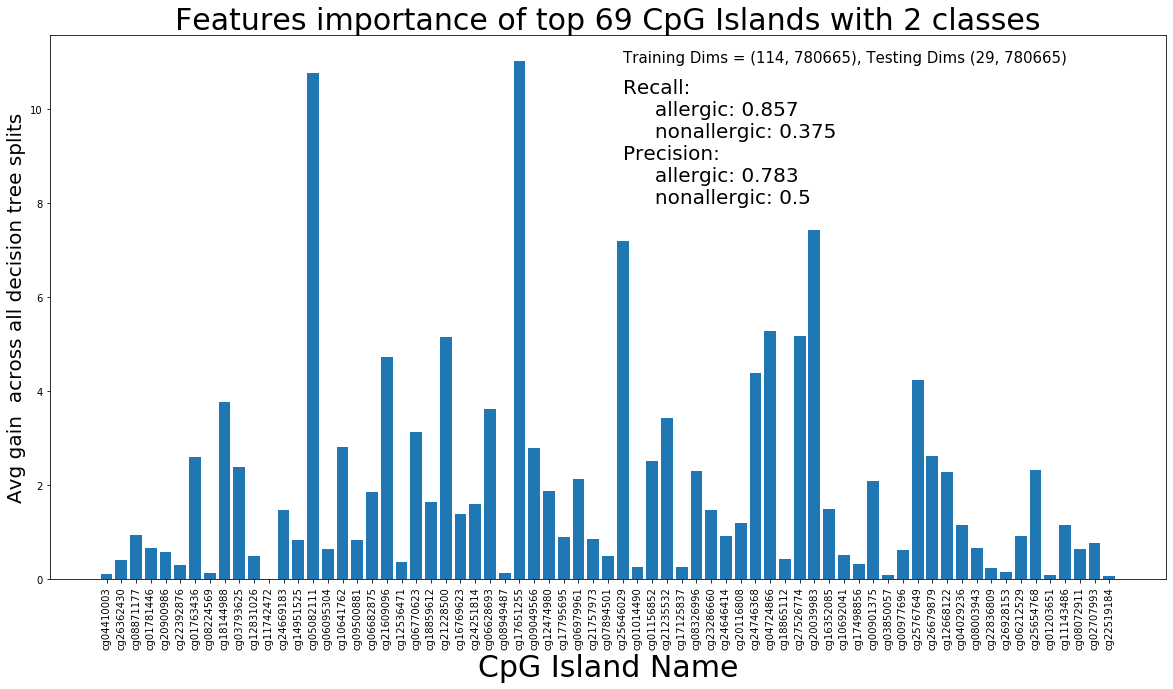

In [391]:
''' Plot bar plot of top features '''
fw_list = [i for i in weight_means.items()]
plt.figure(figsize=(20,10))
plt.bar([t[0] for t in fw_list], [t[1] for t in fw_list], )
plt.xlabel('CpG Island Name',size=30)
plt.ylabel('Avg gain  across all decision tree splits',size=20)
plt.xticks(rotation='vertical')
plt.title('Features importance of top {} CpG Islands with 2 classes'.format(len(fw_list)), size=30)
plt.text(s = results, y = 8, x = 35, size = 20)
plt.text(s = 'Training Dims = {}, Testing Dims {}'.format(X_train.shape, X_test.shape), x=35, y = 11, size = 15)
plt.show()

In [384]:
with open('m2018_ac_report_quality_test.020', 'w') as f:
    f.write(results)
#     f.write(report + '\n')
    for pair in fw_list:
        f.write(str(pair) + '\n')

# Using SHAP for improved feature explanation

In [ ]:
# gse = GEOparse.get_GEO(geo="GSE114134", destdir="data")

In [1]:
# import sys
# !conda install --yes --prefix {sys.prefix} shap

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done
Solving environment: done

## Package Plan ##

  environment location: /Users/tjamesso/miniconda3/envs/broad

  added / updated specs:
    - shap


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    matplotlib-3.1.1           |           py37_1           6 KB  conda-forge
    shap-0.31.0                |   py37h4f17bb1_0         363 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         369 KB

The following NEW packages will be INSTALLED:

  matplotlib         conda-forge/osx-64::matplotlib-3.1.1-py37_1
  shap               conda-forge/osx-64::shap-0.31.0-py37h4f17bb1_0



shap-0.31.0          | 363 KB    | ##################################### | 100% 
matplotlib-3.1.1     | 6 KB      | ###########

In [336]:
file_15 = [('cg23906001', 5.7814978908),
('cg12726839', 1.556391),
('cg03089945', 3.192300596666667),
('cg22699361', 1.14546967),
('cg14324200', 1.1312089),
('cg21647626', 2.9192980933333335),
('cg16347928', 0.702402592),
('cg26647324', 2.82168907),
('cg13938959', 0.443356574),
('cg23596291', 0.554426193),
('cg13792045', 2.26619172),
('cg10207527', 0.247904778),
('cg15706040', 2.51742816),
('cg04926200', 0.390506029),
('cg22618402', 0.211097956),
('cg03127656', 1.288871258),
('cg19642727', 0.140054345),
('cg04018879', 0.127311945),
('cg27156259', 1.44646764),
('cg12743165', 0.0828877687),
('cg02014020', 0.0205308795),
('cg13839293', 0.780323267)]
old_sig_cpg_15 = [c[0] for c in file_15]

In [339]:
file_2018 = [('cg16769623', 9.6037052348),
('cg03791425', 8.03463236),
('cg03252770', 7.478872774999999),
('cg06531475', 2.613668445),
('cg26928153', 0.155844122),
('cg05475702', 1.96376187),
('cg08592768', 5.4231742233333335),
('cg26905303', 5.2607254999999995),
('cg14403224', 4.29349518),
('cg24063007', 0.447762817),
('cg24669183', 0.121440887),
('cg16269199', 0.244901121),
('cg01014490', 1.35698509),
('cg20426671', 4.82534172225),
('cg24684972', 6.30952024),
('cg15979415', 3.08998871),
('cg16736630', 0.60671711),
('cg11789371', 4.306858419999999),
('cg26679879', 0.14452230935),
('cg12179661', 2.285825492),
('cg09448314', 2.67118835),
('cg04121631', 0.0804920197),
('cg11954957', 1.51740897),
('cg11527153', 1.23960888),
('cg13858061', 7.77133942),
('cg03396939', 3.85100842),
('cg23910073', 5.46936989),
('cg07671976', 1.24151087),
('cg23984312', 1.93128395),
('cg13938959', 0.595785141),
('cg03125763', 0.165358573),
('cg12258811', 2.033508656),
('cg09094385', 1.93440914),
('cg24076968', 0.0377840996),
('cg25818623', 1.54501152),
('cg11757945', 0.797060013),
('cg24114126', 0.775182366),
('cg11558822', 2.66519123),
('cg08074007', 2.49597287),
('cg12056547', 0.668363094),
('cg14082599', 1.675078541),
('cg01521154', 1.71092647),
('cg12454161', 0.839935064),
('cg07712540', 1.70147514),
('cg12630698', 1.16246843),
('cg22361181', 2.328002395),
('cg21252483', 2.36881924),
('cg27524361', 0.0736888647),
('cg11067552', 1.43448329),
('cg07453055', 0.207360983),
('cg21942082', 1.29502964),
('cg14405344', 0.561175346),
('cg03128332', 0.21045582),
('cg01197763', 0.200174421),
('cg04625351', 2.2568543),
('cg26687579', 1.22883177),
('cg25654768', 1.57098591),
('cg06659937', 0.0246741772),
('cg13088598', 0.190722704),
('cg06621757', 0.929398596),
('cg11915224', 1.34531355),
('cg21048050', 0.807728291),
('cg26530301', 0.167121202),
('cg05615996', 0.752892733),
('cg25083901', 0.385276079),
('cg17642618', 0.718016803),
('cg26979142', 0.044955492),
('cg04089009', 0.302662849),
('cg02770825', 0.0300304592),
('cg12571629', 1.01915467),
('cg06093500', 0.313094437),
('cg16123908', 0.0199644566)]
old_sig_cpg_18 = {c[0] for c in file_2018}

In [376]:
''' explain 2015 model predictions using shap values '''
# X_15_shap = X_train_15.to_numpy()
explainer_15 = shap.TreeExplainer(model_15_pd)
shap_values_15 = explainer_15.shap_values(X_train_15_pd.to_numpy())

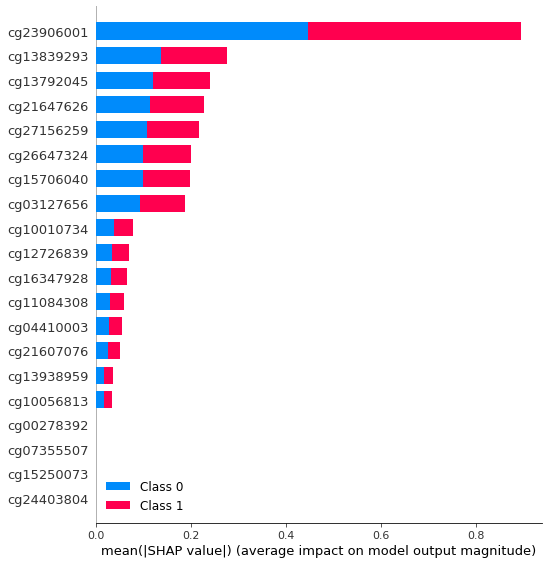

In [379]:
shap.summary_plot(shap_values_15, X_train_15_pd, plot_type='bar', max_display=20)

In [387]:
sig_cpg_15 = {'cg23906001','cg13839293','cg13792045','cg21647626','cg27156259','cg26647324','cg15706040',
'cg03127656','cg10010734','cg12726839','cg16347928','cg11084308','cg04410003','cg21607076','cg13938959',
'cg10056813'}

In [394]:
''' 11 of these 16 cpg islands are the same as when using gain as an importance metric '''
len(sig_cpg_15.intersection(old_sig_cpg_15)), len(sig_cpg_15), sig_cpg_15.intersection(old_sig_cpg_15)

(11,
 16,
 {'cg03127656',
  'cg12726839',
  'cg13792045',
  'cg13839293',
  'cg13938959',
  'cg15706040',
  'cg16347928',
  'cg21647626',
  'cg23906001',
  'cg26647324',
  'cg27156259'})

In [358]:
explainer_15_pd = shap.TreeExplainer(model_15_pd)
shap_values_15_pd = explainer_15_pd.shap_values(X_train_15_pd.to_numpy())

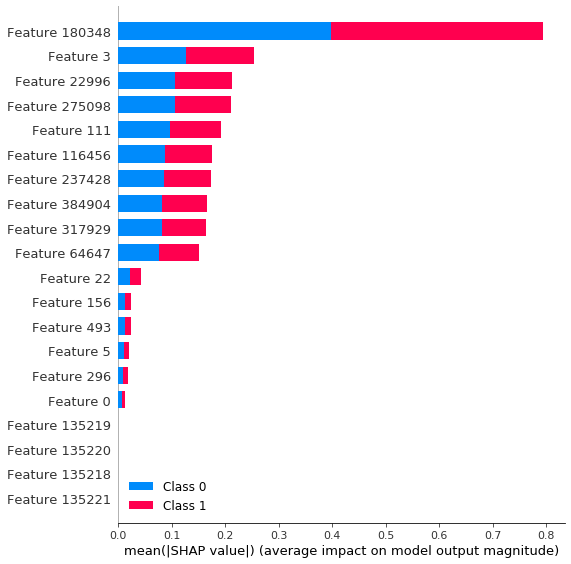

In [360]:
shap.summary_plot(shap_values_15, X_train_15_pd.to_numpy(), plot_type='bar')

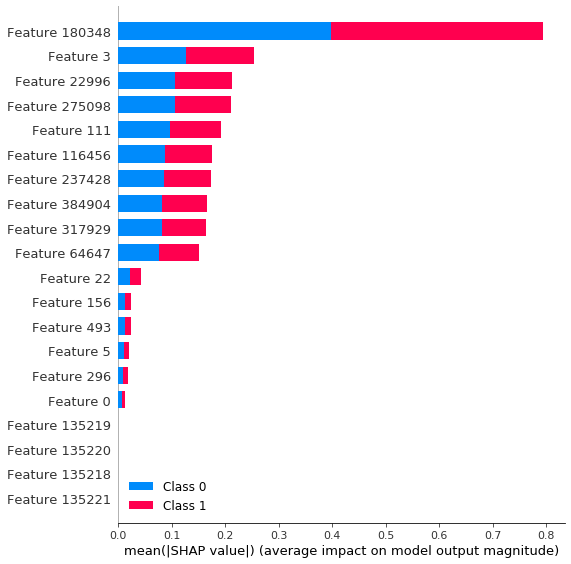

In [364]:
''' visualize prediction explanations '''
shap.summary_plot(shap_values_15, X_train_15, plot_type='bar')

In [ ]:
''' explain 2018 model predictions '''
explainer_18_pd = shap.TreeExplainer(model_18_pd)
shap_values_18_pd = explainer_18_pd.shap_values(X_train_18_pd.to_numpy())

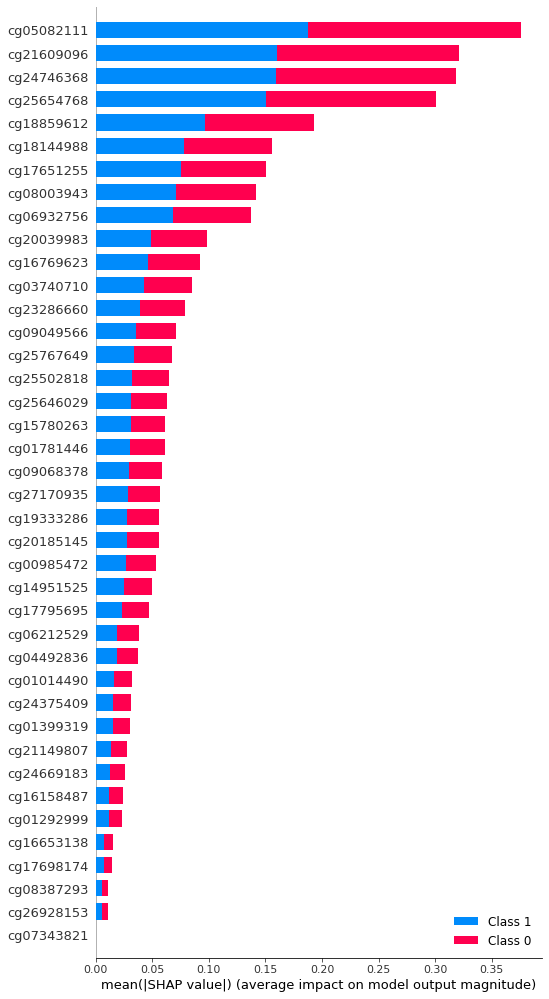

In [385]:
shap.summary_plot(shap_values_18, X_train_18_pd, plot_type='bar', max_display=40)

In [390]:
sig_cpg_18 = {'cg05082111','cg21609096','cg24746368','cg25654768','cg18859612','cg18144988','cg17651255',
'cg08003943','cg06932756','cg20039983','cg16769623','cg03740710','cg23286660','cg09049566','cg25767649',
'cg25502818','cg25646029','cg15780263','cg01781446','cg09068378','cg27170935','cg19333286','cg20185145',
'cg00985472','cg14951525','cg17795695','cg06212529','cg04492836','cg01014490','cg24375409','cg01399319',
'cg21149807','cg24669183','cg16158487','cg01292999','cg16653138','cg17698174','cg08387293','cg26928153'}

In [395]:
''' 5 of these 38 are the same as when using gain '''
len(sig_cpg_18.intersection(old_sig_cpg_18)), len(sig_cpg_18) ,sig_cpg_18.intersection(old_sig_cpg_18)

(5, 39, {'cg01014490', 'cg16769623', 'cg24669183', 'cg25654768', 'cg26928153'})

In [397]:
''' None of these cpg islands are common between the two. Note that martino 2015 uses 450 sequencing while 
martino 2018 uses 850 or EPIC sequencing'''
sig_cpg_15.intersection(sig_cpg_18)

set()

## Compare results using M-values now

In [241]:
def beta_to_m(matrix):
    '''
        convert beta values to m values
    '''
    return np.log2(beta/(1-beta))
    

In [269]:
beta = np.array([[.1, .3, .5], 
              [.2, .4, .6],
              [0.99, 0.1, 0.5]])
m = np.log2(beta/(1-beta))
m

array([[-3.169925  , -1.22239242,  0.        ],
       [-2.        , -0.5849625 ,  0.5849625 ],
       [ 6.62935662, -3.169925  ,  0.        ]])

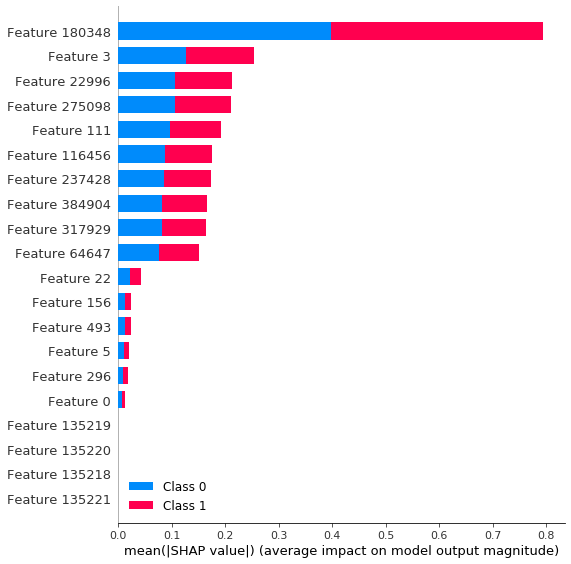

In [360]:
shap.summary_plot(shap_values_15, X_train_15_pd.to_numpy(), plot_type='bar')

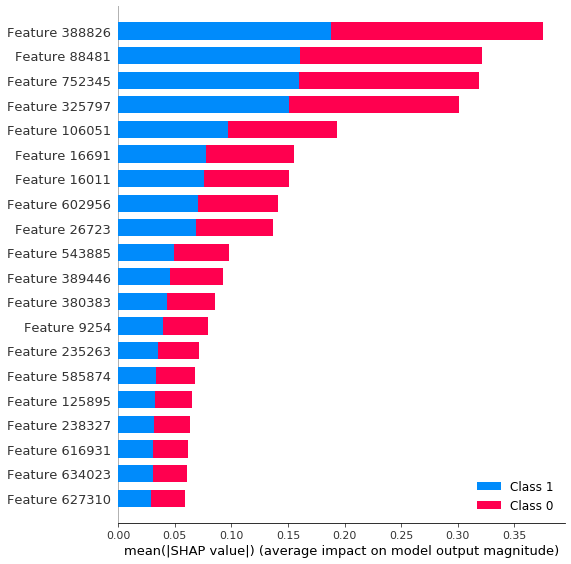

In [363]:
shap.summary_plot(shap_values_18, X_train_18_pd.to_numpy(), plot_type='bar')

## Finding precision and recall of model

In [433]:
def train_model_with_clf(X, y, params, m_values=True):
    acc = 0 
    features = []
    P, R = [], []
#     X_train, X_test, y_train, y_test = train_test_split(X_allergic_v_control, y_allergic_v_control, 
#                                                             test_size=0.2, random_state=123, 
#                                                             stratify=y_allergic_v_control)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, 
                                                        random_state=123, stratify=y)

    # Cast as XGBoost Dmatrices for training
    X_train_np = X_train.to_numpy()
    X_test_np = X_test.to_numpy()
#     return X_train_np
    print(X_train_np.dtype, X_train_np.shape)
    
    if m_values:
        X_train_np = beta_to_m(X_train_np)
        X_test_np = beta_to_m(X_test_np)


    d_train = xgb.DMatrix(data=X_train_np, label=y_train)
    d_test = xgb.DMatrix(data=X_test_np)
    
    # Run multi-class classifier
    clf = xgb.XGBClassifier(**params)
    clf.fit(X_train.to_numpy(), y_train)
#     xgb.train(params, d_train)
    return clf, d_train, d_test, X_train, X_test, y_train, y_test

In [434]:
params = {'max_depth': 10, 'objective': 'multi:softmax',
                 'num_class': 2}
# X_play = train_model(X_allergic_v_control_15, y_allergic_v_control_15, params, m_values=True)
clf_15, d_train_15, d_test_15, X_train, X_test, y_train, y_test = train_model_with_clf(X_allergic_v_control_15, y_allergic_v_control_15, params, m_values=True)
# model_18, d_train_18, d_train_18 = train_model_for_pr(X_allergic_v_control_18, y_allergic_v_control_18, params, m_values=True)

object (21, 405658)


In [472]:
# #consider traing multiple models over n iterations
probs = clf_15.predict_proba(X_test.to_numpy())
prec_2015, recall_2015, t_2015 = sklearn.metrics.precision_recall_curve(y_test, [probs[i][p] for i, p in enumerate(y_test)])
# prec0_2015, recall0_2015, t0_2015 = sklearn.metrics.precision_recall_curve(y_test, [p[y_test[i]] for i in probs])

In [473]:
# probs, y_test, [probs[i][p] for i, p in enumerate(y_test)]

In [450]:
thresholds

array([0., 1.], dtype=float32)

[<matplotlib.lines.Line2D at 0x593dbfa20>]

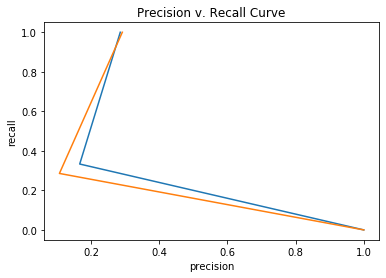

In [479]:
plt.figure()
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('Precision v. Recall Curve')
plt.plot(prec_2015, recall_2015, label='Martino2015')
plt.plot(prec_2018, recall_2018, label='Martino2018')

# plt.plot(prec0_2015, recall0_2015)
# plt.plot(prec1_2018, recall1_2018)
# plt.plot(prec0_2018, recall0_2018)

# line_down, = plt.plot([3,2,1], label='Line 1')
# plt.legend(handles=[line_up, line_down])

[<matplotlib.lines.Line2D at 0x632ec2dd8>]

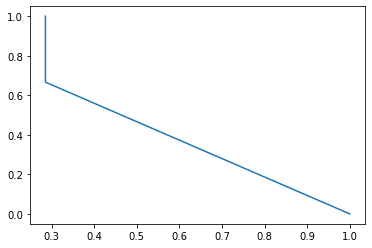

In [454]:
plt.figure()
plt.plot(prec0, recall0)

In [452]:
clf_18, d_train_18, d_test_18, X_train_18, X_test_18, y_train_18, y_test_18 = train_model_with_clf(X_allergic_v_control_18, y_allergic_v_control_18, params, m_values=True)

object (71, 780665)


In [455]:
probs_2018 = clf_18.predict_proba(X_test_18.to_numpy())

In [478]:
# #consider traing multiple models over n iterations
prec_2018, recall_2018, t_2018 = sklearn.metrics.precision_recall_curve(y_test_18, [probs_2018[i][p] for i, p in enumerate(y_test_18)])

## Using same precision and recall as in epidish

In [526]:
def get_sample_names(file):
    '''
        Get samples names from file
    '''
    samples = []
    with open(file) as f:
        for line in f.readlines():
            samples.append(line[:-1])
    return samples   

def get_row_nums(sample_dicts, sample_names):
    '''
        Get row numbers from sample dicts
    '''
    S = set(sample_names)
    ix = []
    for i, d in enumerate(sample_dicts):
        if d['sample_name'] in S:
            ix.append(i)
    return ix

In [514]:
''' get training set names'''
train_names_2015 = get_sample_names('./data/m2015_train_test/training_set.txt')
test_names_2015 = get_sample_names('./data/m2015_train_test/test_set.txt')
train_names_2018 = get_sample_names('./data/m2018_train_test/training_set.txt')
test_names_2018 = get_sample_names('./data/m2018_train_test/test_set.txt')

In [533]:
''' find indices where those samples exist'''
ix_train_15 = get_row_nums(samples_15, train_names_2015)
ix_test_15 = get_row_nums(samples_15, test_names_2015)
ix_train_18 = get_row_nums(samples_18, train_names_2018)
ix_test_18 = get_row_nums(samples_18, test_names_2018)

In [540]:
y_allergic_v_control_15

array([0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

In [541]:
features_15

,characteristics_ch1.0.gender,characteristics_ch1.1.phenotype,characteristics_ch1.2.challenge outcome,treatment_protocol_ch1,growth_protocol_ch1,molecule_ch1,cg13938959,cg23733394,cg08900511,cg04410003,...,cg06422471,cg19324023,cg19004771,cg20569369,cg26034629,cg05615487,cg00080682,cg08423507,cg19565306,cg09226288
0,FEMALE,Egg.allergic,allergic,NA,untouched cells rested for 48 hours in RPMI me...,genomic DNA,0.780938,0.4521,0.904995,0.897094,...,0.907134,0.91619,0.850124,0.869802,0.87296,0.861876,0.938466,0.91167,0.178807,0.768448
1,FEMALE,Non.allergic,nonallergic,NA,untouched cells rested for 48 hours in RPMI me...,genomic DNA,0.849993,0.439448,0.939339,0.884464,...,0.905706,0.896416,0.853825,0.858188,0.827342,0.867073,0.8839,0.894825,0.255123,0.691983
2,MALE,Peanut.allergic,allergic,NA,untouched cells rested for 48 hours in RPMI me...,genomic DNA,0.808916,0.475487,0.921199,0.910001,...,0.911795,0.932199,0.810342,0.856055,0.83853,0.84668,0.902766,0.885604,0.305552,0.77046
3,FEMALE,Peanut.sensitized,sensitized,NA,untouched cells rested for 48 hours in RPMI me...,genomic DNA,0.815433,0.66791,0.906676,0.879404,...,0.910199,0.893875,0.887602,0.870224,0.85807,0.870435,0.921329,0.907253,0.227432,0.761105
4,FEMALE,Peanut.allergic,allergic,NA,untouched cells rested for 48 hours in RPMI me...,genomic DNA,0.799225,0.38762,0.908183,0.882496,...,0.912448,0.867508,0.834638,0.853681,0.868524,0.88451,0.901682,0.903969,0.267781,0.78066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,MALE,Peanut.allergic,allergic,NA,untouched cells rested for 48 hours in RPMI me...,genomic DNA,0.808754,0.473354,0.911046,0.895579,...,0.922546,0.905274,0.812087,0.864472,0.841029,0.883782,0.897826,0.933094,0.296834,0.746121
67,FEMALE,Non.allergic,nonallergic,NA,untouched cells rested for 48 hours in RPMI me...,genomic DNA,0.833515,0.599612,0.871368,0.937265,...,0.937752,0.925167,0.872634,0.865245,0.881756,0.880947,0.902013,0.912302,0.0948948,0.796236
68,FEMALE,Peanut.sensitized,sensitized,NA,untouched cells rested for 48 hours in RPMI me...,genomic DNA,0.781575,0.687101,0.900929,0.92097,...,0.936635,0.918067,0.875856,0.880047,0.889854,0.912604,0.922206,0.92132,0.141271,0.740769
69,FEMALE,Egg.sensitized,sensitized,NA,untouched cells rested for 48 hours in RPMI me...,genomic DNA,0.786878,0.531393,0.904101,0.931156,...,0.931091,0.869253,0.861495,0.873291,0.868062,0.925606,0.912379,0.917473,0.229078,0.80135


In [551]:
'Ignoring all metadata for now'
#martino 2015
X_15_train, y_15_train = features_15.iloc[ix_train_15,6:], features_15['characteristics_ch1.2.challenge outcome'][ix_train_15]
X_15_test, y_15_test = features_15.iloc[ix_test_15,6:], features_15['characteristics_ch1.2.challenge outcome'][ix_test_15]

# #martino 2018
X_18_train, y_18_train = features_18.iloc[ix_train_18,6:], features_18['characteristics_ch1.2.allergy status'][ix_train_18]
X_18_test, y_18_test = features_18.iloc[ix_test_18,6:], features_18['characteristics_ch1.2.allergy status'][ix_test_18]

In [570]:
len(y_18_test), y_18_test

(30, 0      allergic
 1      allergic
 10      control
 20      control
 27      control
 28      control
 39      control
 46      control
 49      control
 58     allergic
 59     allergic
 63      control
 64     allergic
 75     allergic
 78     allergic
 82     allergic
 88     allergic
 91     allergic
 100    allergic
 109    allergic
 117    allergic
 127    allergic
 135    allergic
 149    allergic
 153    allergic
 167    allergic
 180    allergic
 189    allergic
 192    allergic
 193    allergic
 Name: characteristics_ch1.2.allergy status, dtype: object)

In [557]:
# Define parameters for training 
def train_model_choose_samples(X_train, X_test, y_train, y_test, params, m_values=True):
    acc = 0 
    features = []
    P, R = [], []
#     X_train, X_test, y_train, y_test = train_test_split(X_allergic_v_control, y_allergic_v_control, 
#                                                             test_size=0.2, random_state=123, 
#                                                             stratify=y_allergic_v_control)
    

    # Cast as XGBoost Dmatrices for training
    X_train_np = X_train.to_numpy()
    X_test_np = X_test.to_numpy()
#     return X_train_np
    print(X_train_np.dtype, X_train_np.shape)
    
    if m_values:
        X_train_np = beta_to_m(X_train_np)
        X_test_np = beta_to_m(X_test_np)

    y_int = LabelEncoder().fit_transform(y_train)
    y_int_test = LabelEncoder().fit_transform(y_test)

    d_train = xgb.DMatrix(data=X_train_np, label=y_int)
    d_test = xgb.DMatrix(data=X_test_np)
    
    # Run multi-class classifier
    bst = xgb.train(params, d_train)
    return bst, d_train, d_test, y_int, y_int_test

In [558]:
m15_sub, dtrains_15, dtests_15, ytrain_15, ytest_15 = train_model_choose_samples(X_15_train, X_15_test, y_15_train, y_15_test, params, m_values=True)
# m18_sub, X_18_sub, y_18_sub = train_model_choose_samples(X_18_train, X_18_test, y_18_train, y_18_test, params, m_values=True)

object (32, 405658)


In [562]:
m18_sub, dtrains_18, dtests_18, ytrain_18, ytest_18 = train_model_choose_samples(X_18_train, X_18_test, y_18_train, y_18_test, params, m_values=True)

object (113, 780665)


In [565]:
''' Get precision and recall for 2015 and 2018 '''
# 2015
pred15 = m15_sub.predict(dtests_15)
precision15, recall15, _, _ = sklearn.metrics.precision_recall_fscore_support(ytest_15, pred15)
precision15, recall15

(array([0.28571429, 0.        ]), array([0.4, 0. ]))

In [564]:
# 2018
pred18 = m18_sub.predict(dtests_18)
precision18, recall18, _, _ = sklearn.metrics.precision_recall_fscore_support(ytest_18, pred18)
precision18, recall18

(array([0.76923077, 0.5       ]), array([0.90909091, 0.25      ]))